In [ ]:
# Move your photos in the Google colab environment
# Wait until it uploads

# Code adapted from here https://stackoverflow.com/questions/58751101/count-number-of-cells-in-the-image

## Picture comression

In [ ]:
import cv2
import os
import glob

def reduce_resolution_and_convert_to_jpg(file_name):
    # Reading TIF
    image = cv2.imread(file_name, cv2.IMREAD_UNCHANGED)

    if image is None:
        print(f"Error: Unable to read the image file '{file_name}'")
        return

    # New size
    height, width = image.shape[:2]
    new_width = width // 4
    new_height = height // 4

    # Compression
    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

    # Naming
    base_name = os.path.splitext(os.path.basename(file_name))[0]

    # Path for save
    output_file = base_name + ".jpg"

    # Saving compressed photos in JPEG
    cv2.imwrite(output_file, resized_image)
    print(f"File saved as '{output_file}'")

    # Remove the original file
    os.remove(file_name)
    print(f"File '{file_name}' removed")

# Find all .tif files in the current directory
tif_files = glob.glob("*.tif")

# Process each .tif file
for file_name in tif_files:
    reduce_resolution_and_convert_to_jpg(file_name)


File saved as 'Seva Exp 170524_A1_2.jpg'
File 'Seva Exp 170524_A1_2.tif' removed
File saved as 'Seva Exp 170524_A1_3.jpg'
File 'Seva Exp 170524_A1_3.tif' removed
File saved as 'Seva Exp 170524_A1_4.jpg'
File 'Seva Exp 170524_A1_4.tif' removed
File saved as 'Seva Exp 170524_A1_6.jpg'
File 'Seva Exp 170524_A1_6.tif' removed
File saved as 'Seva Exp 170524_A1_5.jpg'
File 'Seva Exp 170524_A1_5.tif' removed
File saved as 'Seva Exp 170524_A1_1.jpg'
File 'Seva Exp 170524_A1_1.tif' removed


## Chosing name of the picture

In [ ]:
pic = "Seva Exp 170524_A1_1.jpg"  # Put a name of the picture

## Geting mask parametrs

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

def process_image(h_lower, s_lower, v_lower, h_upper, s_upper, v_upper):
    hsv_lower = np.array([h_lower, s_lower, v_lower])
    hsv_upper = np.array([h_upper, s_upper, v_upper])

    mask = cv2.inRange(hsv, hsv_lower, hsv_upper)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.title('Original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Mask')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()
    print(f'hsv_lower = np.array([{h_lower}, {s_lower}, {v_lower}])')
    print(f'hsv_upper = np.array([{h_upper}, {s_upper}, {v_upper}])')

# Load the image
image_path = pic
image = cv2.imread(image_path)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Predefined HSV values
initial_h_lower = 0
initial_s_lower = 83
initial_v_lower = 98
initial_h_upper = 179
initial_s_upper = 100
initial_v_upper = 220

# Create sliders for HSV values
interact(
    process_image,
    h_lower=IntSlider(min=0, max=179, step=1, value=initial_h_lower, description='H Lower'),
    s_lower=IntSlider(min=0, max=255, step=1, value=initial_s_lower, description='S Lower'),
    v_lower=IntSlider(min=0, max=255, step=1, value=initial_v_lower, description='V Lower'),
    h_upper=IntSlider(min=0, max=179, step=1, value=initial_h_upper, description='H Upper'),
    s_upper=IntSlider(min=0, max=255, step=1, value=initial_s_upper, description='S Upper'),
    v_upper=IntSlider(min=0, max=255, step=1, value=initial_v_upper, description='V Upper')
)

interactive(children=(IntSlider(value=0, description='H Lower', max=179), IntSlider(value=83, description='S L…

<function __main__.process_image(h_lower, s_lower, v_lower, h_upper, s_upper, v_upper)>

## Spheroids calculation, one comressed picture

Spheroids: 5


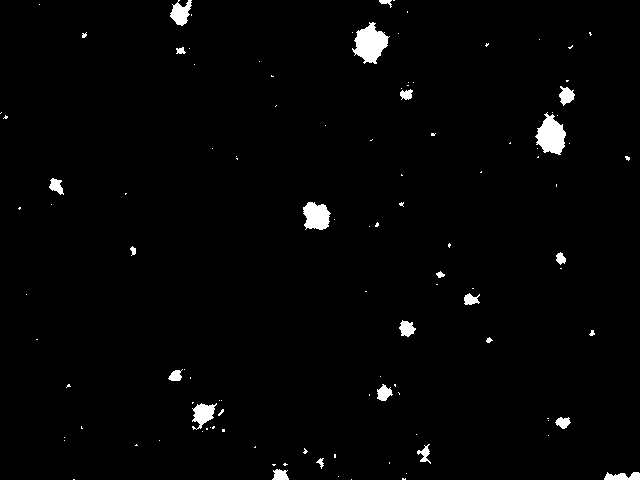

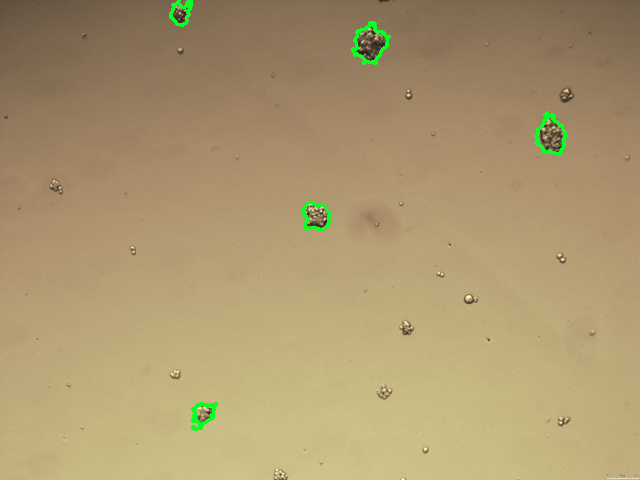

-1

In [ ]:
import cv2
import numpy as np
import math
from google.colab.patches import cv2_imshow  # Special for Colab

# Picture opening
image_path = pic
image = cv2.imread(image_path)
original = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Tune HSV
hsv_lower = np.array([0, 83, 35])
hsv_upper = np.array([179, 100, 220])

# Creation mask
mask = cv2.inRange(hsv, hsv_lower, hsv_upper)
if mask.mean() > 255/2:
    mask = cv2.bitwise_not(mask)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

# Making borders
cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Count
minimum_area = 200  # picsels
spheroids = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > minimum_area:
        cv2.drawContours(original, [c], -1, (36,255,12), 2)
        spheroids += 1

# Shown mask and picture
print('Spheroids: {}'.format(spheroids))
cv2_imshow(close)
cv2_imshow(original)
cv2.waitKey()

## Spheroids calculation, many comressed pictures

In [ ]:
import cv2
import numpy as np
import math
import os

def process_image(file_name):
    image = cv2.imread(file_name)
    if image is None:
        print(f"Error: Unable to read the image file '{file_name}'")
        return

    original = image.copy()
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Tune mask
    hsv_lower = np.array([0, 83, 98])
    hsv_upper = np.array([179, 100, 220])

    mask = cv2.inRange(hsv, hsv_lower, hsv_upper)
    if mask.mean() > 255/2:
        mask = cv2.bitwise_not(mask)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)

    cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    minimum_area = 200  # Tune size
    spheroids = 0
    for c in cnts:
        area = cv2.contourArea(c)
        if area > minimum_area:
            cv2.drawContours(original, [c], -1, (36, 255, 12), 2)
            spheroids += 1
    print(f'{os.path.basename(file_name)}: Spheroids: {spheroids}')

if __name__ == "__main__":
    current_folder = os.getcwd()
    files = os.listdir(current_folder)

    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png", ".tif")):
            file_path = os.path.join(current_folder, file)
            process_image(file_path)


Seva Exp 170524_A1_2.jpg: Spheroids: 8
Seva Exp 170524_A1_6.jpg: Spheroids: 13
Seva Exp 170524_A1_1.jpg: Spheroids: 5
Seva Exp 170524_A1_3.jpg: Spheroids: 16
Seva Exp 170524_A1_5.jpg: Spheroids: 6
Seva Exp 170524_A1_4.jpg: Spheroids: 10
